In [1]:
using LaplaceRedux.Data
using Flux

using CSV
using DataFrames

using Random
Random.seed!(42)

df = CSV.read("data1.csv", DataFrame)
x = Matrix(df[:, 1:2])
x = [x[i, :] for i in 1:size(x, 1)]
y = df[:, 3]

# Prepare data for training
X = hcat(x...)
y_train = Flux.onehotbatch(y, unique(y[:, 1]))

[ Info: Precompiling LaplaceRedux [c52c1a26-f7c5-402b-80be-ba1e638ad478]
┌ Warning: The NVIDIA driver on this system only supports up to CUDA 11.1.0.
│ For performance reasons, it is recommended to upgrade to a driver that supports CUDA 11.2 or higher.
└ @ CUDA C:\Users\Lenovo\.julia\packages\CUDA\s0e3j\src\initialization.jl:70


4×100 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  1  1  1  1  1  1  1  1  1  1  1

In [2]:
data = zip(x,y_train)
n_hidden = 3
D = size(X,1)
out_dim = length(unique(y))
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, out_dim)
)  
loss(x, y) = Flux.Losses.logitcrossentropy(nn(x), y, dims = 1)

loss (generic function with 1 method)

In [3]:
using Flux.Optimise: update!, Adam
using Statistics
opt = Adam()
epochs = 1200
show_every = epochs/10

for epoch = 1:epochs
    loss_sum = 0
    
    gs = gradient(Flux.params(nn)) do
        loss(X, y_train)
    end
    update!(opt, Flux.params(nn), gs)
    
    loss_sum += loss(X, y_train)
    
    if epoch % show_every == 0
        println("Epoch ", epoch)
        println("Loss: ", loss_sum)
    end
end

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 3, σ)    # 9 parameters
│   summary(x) = "2×100 Matrix{Float64}"
└ @ Flux C:\Users\Lenovo\.julia\packages\Flux\FWgS0\src\layers\stateless.jl:50


Epoch 120
Loss: 1.4895138
Epoch 240
Loss: 1.2993275
Epoch 360
Loss: 1.1667596
Epoch 480
Loss: 1.0728248
Epoch 600
Loss: 1.0018053
Epoch 720
Loss: 0.9452295
Epoch 840
Loss: 0.9000441
Epoch 960
Loss: 0.86398745
Epoch 1080
Loss: 0.8349783
Epoch 1200
Loss: 0.811208


In [4]:
using LaplaceRedux
la = Laplace(nn; likelihood=:classification)
fit!(la, data)
optimize_prior!(la; verbose=true, n_steps=1000)

loss(exp.(logP₀), exp.(logσ)) = 196.00028908881495
Log likelihood: -185.1986780166626
Log det ratio: 16.70516615109844
Scatter: 4.89805599320626
loss(exp.(logP₀), exp.(logσ)) = 196.00028313572736
Log likelihood: -185.1986780166626
Log det ratio: 16.714982692059074
Scatter: 4.8882275460704445
loss(exp.(logP₀), exp.(logσ)) = 196.00028313543518
Log likelihood: -185.1986780166626
Log det ratio: 16.715052484401962
Scatter: 4.888157753143219
loss(exp.(logP₀), exp.(logσ)) = 196.0002831354352
Log likelihood: -185.1986780166626
Log det ratio: 16.715051983231724
Scatter: 4.888158254313477


[ Info: Iteration 100: P₀=0.33583202338875223, σ=1.0
[ Info: Iteration 200: P₀=0.3351581423034873, σ=1.0
[ Info: Iteration 300: P₀=0.33515335699682686, σ=1.0
[ Info: Iteration 400: P₀=0.3351533913592395, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 196.00028313543518
Log likelihood: -185.1986780166626
Log det ratio: 16.715051978287065
Scatter: 4.88815825925809
loss(exp.(logP₀), exp.(logσ)) = 196.00028313543518
Log likelihood: -185.1986780166626
Log det ratio: 16.71505197827577
Scatter: 4.888158259269407
loss(exp.(logP₀), exp.(logσ)) = 196.00028313543518
Log likelihood: -185.1986780166626
Log det ratio: 16.715051978275863
Scatter: 4.888158259269329
loss(exp.(logP₀), exp.(logσ)) = 196.0002831354352
Log likelihood: -185.1986780166626
Log det ratio: 16.715051978275874
Scatter: 4.888158259269327

[ Info: Iteration 500: P₀=0.33515339169826364, σ=1.0
[ Info: Iteration 600: P₀=0.33515339169903957, σ=1.0
[ Info: Iteration 700: P₀=0.33515339169903424, σ=1.0
[ Info: Iteration 800: P₀=0.3351533916990341, σ=1.0



loss(exp.(logP₀), exp.(logσ)) = 196.0002831354352
Log likelihood: -185.1986780166626
Log det ratio: 16.715051978275874
Scatter: 4.888158259269324
loss(exp.(logP₀), exp.(logσ)) = 196.0002831354352
Log likelihood: -185.1986780166626
Log det ratio: 16.715051978275874
Scatter: 4.888158259269327


[ Info: Iteration 900: P₀=0.3351533916990339, σ=1.0
[ Info: Iteration 1000: P₀=0.3351533916990341, σ=1.0


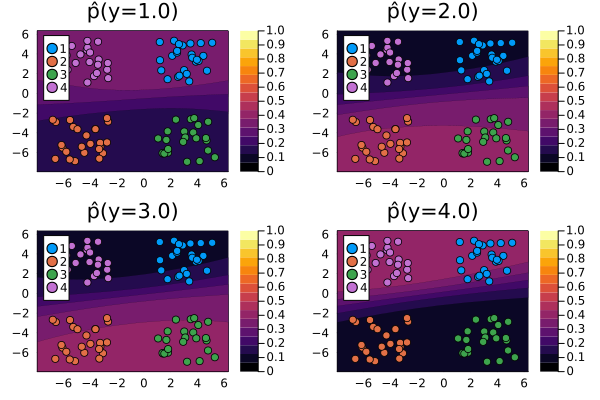

In [5]:
using Plots
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1))
    push!(plt_list, plt)
end
plot(plt_list...)

In [6]:
predictions_probit = reduce(hcat, predict(la, X))
predictions_probit = reshape(predictions_probit, 4, 100)

4×100 Matrix{Float64}:
 0.358037  0.358282  0.357475  0.355308  …  0.354396  0.349227  0.353264
 0.108337  0.109892  0.112314  0.132339     0.109464  0.116758  0.112114
 0.105157  0.106859  0.109296  0.130527     0.105808  0.112654  0.108422
 0.428469  0.424967  0.420915  0.381826     0.430332  0.421362  0.4262

In [7]:
# Create a DataFrame with column names
df = DataFrame(class1=predictions_probit[1,:],
               class2=predictions_probit[2,:],
               class3=predictions_probit[3,:],
               class4=predictions_probit[4,:])

# Write table to CSV file
CSV.write("predictions1-Julia.csv", df)

"predictions1-Julia.csv"

In [ ]:
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1), link_approx=:plugin)
    push!(plt_list, plt)
end
plot(plt_list...)

In [ ]:
predictions_plugin = reduce(hcat, predict(la, X, link_approx=:plugin))
predictions_plugin = reshape(predictions_plugin, 4, 100)